In [1]:
from typing import List
from collections import Counter

In [2]:
def raw_majority_vote(labels: List[str]) -> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

In [3]:
assert raw_majority_vote(['a', 'b', 'c', 'b']) == 'b'

In [4]:
def majority_vote(labels: List[str]) -> str:
    """Assumes that labels are ordered from nearest to farthest."""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

In [5]:
# Tie, so look at first 4, then 'b'
assert majority_vote(['a', 'b', 'c', 'b', 'a']) == 'b'

In [6]:
from typing import NamedTuple
import import_ipynb
from linear_algebra import Vector, distance

importing Jupyter notebook from linear_algebra.ipynb


In [7]:
class LabeledPoint(NamedTuple):
    point: Vector
    label: str

In [8]:
def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:

    # Order the labeled points from nearest to farthest.
    by_distance = sorted(labeled_points,
                         key=lambda lp: distance(lp.point, new_point))

    # Find the labels for the k closest
    k_nearest_labels = [lp.label for lp in by_distance[:k]]

    # and let them vote.
    return majority_vote(k_nearest_labels)

In [9]:
import random

In [10]:
def random_point(dim: int) -> Vector:
    return [random.random() for _ in range(dim)]

In [11]:
def random_distances(dim: int, num_pairs: int) -> List[float]:
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

In [12]:
# def main():
#     from typing import Dict
#     import csv
#     from collections import defaultdict
    
#     def parse_iris_row(row: List[str]) -> LabeledPoint:
#         """
#         sepal_length, sepal_width, petal_length, petal_width, class
#         """
#         measurements = [float(value) for value in row[:-1]]
#         # class is e.g. "Iris-virginica"; we just want "virginica"
#         label = row[-1].split("-")[-1]
    
#         return LabeledPoint(measurements, label)
    
#     with open('iris.csv') as f:
#         reader = csv.reader(f)
#         iris_data = [parse_iris_row(row) for row in reader]
    
#     # We'll also group just the points by species/label so we can plot them.
#     points_by_species: Dict[str, List[Vector]] = defaultdict(list)
#     for iris in iris_data:
#         points_by_species[iris.label].append(iris.point)
    
#     from matplotlib import pyplot as plt
#     metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']
#     pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
#     marks = ['+', '.', 'x']  # we have 3 classes, so 3 markers
    
#     fig, ax = plt.subplots(2, 3)
    
#     for row in range(2):
#         for col in range(3):
#             i, j = pairs[3 * row + col]
#             ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8)
#             ax[row][col].set_xticks([])
#             ax[row][col].set_yticks([])
    
#             for mark, (species, points) in zip(marks, points_by_species.items()):
#                 xs = [point[i] for point in points]
#                 ys = [point[j] for point in points]
#                 ax[row][col].scatter(xs, ys, marker=mark, label=species)
    
#     ax[-1][-1].legend(loc='lower right', prop={'size': 6})
#     # plt.show()
    
    
    
#     plt.savefig('images/iris_scatter.png')
#     plt.gca().clear()
    
#     import random
#     from machine_learning import split_data
    
#     random.seed(12)
#     iris_train, iris_test = split_data(iris_data, 0.70)
#     assert len(iris_train) == 0.7 * 150
#     assert len(iris_test) == 0.3 * 150
    
#     from typing import Tuple
    
#     # track how many times we see (predicted, actual)
#     confusion_matrix: Dict[Tuple[str, str], int] = defaultdict(int)
#     num_correct = 0
    
#     for iris in iris_test:
#         predicted = knn_classify(5, iris_train, iris.point)
#         actual = iris.label
    
#         if predicted == actual:
#             num_correct += 1
    
#         confusion_matrix[(predicted, actual)] += 1
    
#     pct_correct = num_correct / len(iris_test)
#     print(pct_correct, confusion_matrix)
    
#     import tqdm
#     dimensions = range(1, 101)
    
#     avg_distances = []
#     min_distances = []
    
#     random.seed(0)
#     for dim in tqdm.tqdm(dimensions, desc="Curse of Dimensionality"):
#         distances = random_distances(dim, 10000)      # 10,000 random pairs
#         avg_distances.append(sum(distances) / 10000)  # track the average
#         min_distances.append(min(distances))          # track the minimum
    
#     min_avg_ratio = [min_dist / avg_dist
#                      for min_dist, avg_dist in zip(min_distances, avg_distances)]
    
# if __name__ == "__main__": main()

## break of the function main above

In [13]:
from typing import Dict
import csv
from collections import defaultdict

In [14]:
def parse_iris_row(row: List[str]) -> LabeledPoint:
        """
        sepal_length, sepal_width, petal_length, petal_width, class
        """
        measurements = [float(value) for value in row[:-1]]
        # class is e.g. "Iris-virginica"; we just want "virginica"
        label = row[-1].split("-")[-1]
    
        return LabeledPoint(measurements, label)

In [15]:
with open('iris.csv') as f:
        reader = csv.reader(f)
        iris_data = [parse_iris_row(row) for row in reader]

In [16]:
iris_data[:3]

[LabeledPoint(point=[], label='5.1,3.5,1.4,.2,"Setosa"'),
 LabeledPoint(point=[], label='4.9,3,1.4,.2,"Setosa"'),
 LabeledPoint(point=[], label='4.7,3.2,1.3,.2,"Setosa"')]

In [17]:
# We'll also group just the points by species/label so we can plot them.
points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)

In [18]:
iris.point

[]

In [19]:
from matplotlib import pyplot as plt

In [20]:
metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [21]:
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
pairs

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [22]:
marks = ['+', '.', 'x']  # we have 3 classes, so 3 markers
marks

['+', '.', 'x']

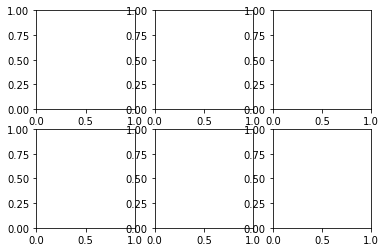

In [23]:
fig, ax = plt.subplots(2, 3)

In [24]:
# for row in range(2):
#     for col in range(3):
#         i, j = pairs[3 * row + col]
#         ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8)
#         ax[row][col].set_xticks([])
#         ax[row][col].set_yticks([])

#         for mark, (species, points) in zip(marks, points_by_species.items()):
#             xs = [point[i] for point in points]
#             ys = [point[j] for point in points]
#             ax[row][col].scatter(xs, ys, marker=mark, label=species)

# ax[-1][-1].legend(loc='lower right', prop={'size': 6})
# plt.show()

In [25]:
ax[-1][-1].legend(loc='lower right', prop={'size': 6})
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [26]:
# plt.savefig('im/iris_scatter.png')
# plt.gca().clear()

In [27]:
import random
from machine_learning import split_data

importing Jupyter notebook from machine_learning.ipynb


In [28]:
random.seed(12)
iris_train, iris_test = split_data(iris_data, 0.70)
len(iris_train), len(iris_test)

(105, 45)

In [29]:
len(iris_data)

150

In [30]:
assert len(iris_train) == 0.7 * 150

In [31]:
assert len(iris_test) == 0.3 * 150

In [32]:
from typing import Tuple

In [33]:
# track how many times we see (predicted, actual)
confusion_matrix: Dict[Tuple[str, str], int] = defaultdict(int)
num_correct = 0

In [34]:
confusion_matrix, num_correct

(defaultdict(int, {}), 0)

In [35]:
for iris in iris_test:
    predicted = knn_classify(5, iris_train, iris.point)
    actual = iris.label
    
    if predicted == actual:
        num_correct += 1
    
    confusion_matrix[(predicted, actual)] += 1

In [36]:
pct_correct = num_correct / len(iris_test)
print(pct_correct, confusion_matrix)

0.0 defaultdict(<class 'int'>, {('4.9,3.1,1.5,.1,"Setosa"', '5,3.5,1.3,.3,"Setosa"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '5.6,2.5,3.9,1.1,"Versicolor"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '5.1,3.5,1.4,.3,"Setosa"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '6.5,3,5.2,2,"Virginica"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '6.5,3,5.5,1.8,"Virginica"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '5.8,4,1.2,.2,"Setosa"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '6.3,3.3,4.7,1.6,"Versicolor"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '6.5,2.8,4.6,1.5,"Versicolor"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '7.7,2.8,6.7,2,"Virginica"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '5.2,3.4,1.4,.2,"Setosa"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '6.7,3.1,4.4,1.4,"Versicolor"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '5.4,3,4.5,1.5,"Versicolor"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '6.9,3.2,5.7,2.3,"Virginica"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '6.5,3,5.8,2.2,"Virginica"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '5,3.4,1.5,.2,"Setosa"'): 1, ('4.9,3.1,1.5,.1,"Setosa"', '6.9,3.1,5.4,2.1,"Virginica"

In [37]:
import tqdm
dimensions = range(1, 101)

In [38]:
avg_distances = []
min_distances = []
random.seed(0)

In [39]:
for dim in tqdm.tqdm(dimensions, desc="Curse of Dimensionality"):
    distances = random_distances(dim, 10000)      # 10,000 random pairs
    avg_distances.append(sum(distances) / 10000)  # track the average
    min_distances.append(min(distances))          # track the minimum

Curse of Dimensionality: 100%|███████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.84it/s]


In [40]:
# def random_point(dim: int) -> Vector:
#     return [random.random() for _ in range(dim)]

In [41]:
# def random_distances(dim: int, num_pairs: int) -> List[float]:
#     return [distance(random_point(dim), random_point(dim))
#             for _ in range(num_pairs)]

In [42]:
print(len(distances))
distances[:3]

10000


[4.207411108403404, 3.9826674600725642, 4.043086444733868]

In [43]:
print(len(avg_distances))
avg_distances[:3]

100


[0.3310009902894413, 0.5239565117360907, 0.6627400615351537]

In [44]:
print(len(min_distances))
min_distances[:3]

100


[7.947421226228712e-06, 0.006484482319022018, 0.03888081104350126]

In [45]:
min_avg_ratio = [min_dist / avg_dist
                     for min_dist, avg_dist in zip(min_distances, avg_distances)]
min_avg_ratio[:3]

[2.4010264196729895e-05, 0.012375993376885747, 0.05866675835687187]

In [46]:
#if __name__ == "__main__": main()